In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Lead_Scoring.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

filling last activity and last notable actiivty

Missing values before filling: 103
Missing values after filling: 0


C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_5296\2820424699.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Last Activity"].fillna(most_common_activity, inplace=True)


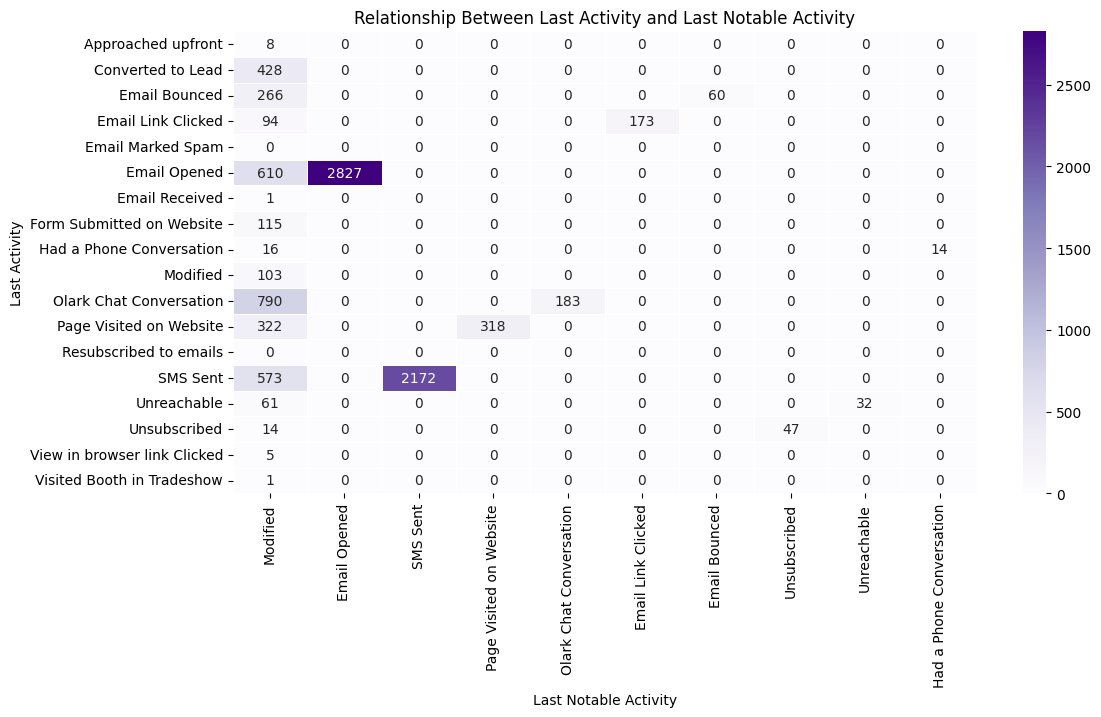

In [23]:
# import pandas as pd
import matplotlib.pyplot as plt

# Check missing values in "Last Activity"
print("Missing values before filling:", df["Last Activity"].isna().sum())

# Fill missing "Last Activity" with corresponding "Last Notable Activity"
df.loc[df["Last Activity"].isna(), "Last Activity"] = df["Last Notable Activity"]

# Fill any remaining missing values with the most common activity
most_common_activity = df["Last Activity"].mode()[0]
df["Last Activity"].fillna(most_common_activity, inplace=True)

# Check missing values after filling
print("Missing values after filling:", df["Last Activity"].isna().sum())

# Visualize the relationship between "Last Activity" and "Last Notable Activity"
plt.figure(figsize=(12, 6))
activity_pivot = df.pivot_table(index="Last Activity", columns="Last Notable Activity", aggfunc="size", fill_value=0)
top_activities = activity_pivot.loc[:, activity_pivot.sum(axis=0).nlargest(10).index]
sns.heatmap(top_activities, annot=True, cmap="Purples", fmt="d", linewidths=0.5)
plt.xlabel("Last Notable Activity")
plt.ylabel("Last Activity")
plt.title("Relationship Between Last Activity and Last Notable Activity")
plt.show()

Missing values before filling:
Country    2461
City       1420
dtype: int64
Missing values after filling:
Country    0
City       0
dtype: int64


C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_5296\1957990737.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].fillna("Unknown City", inplace=True)
C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_5296\1957990737.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



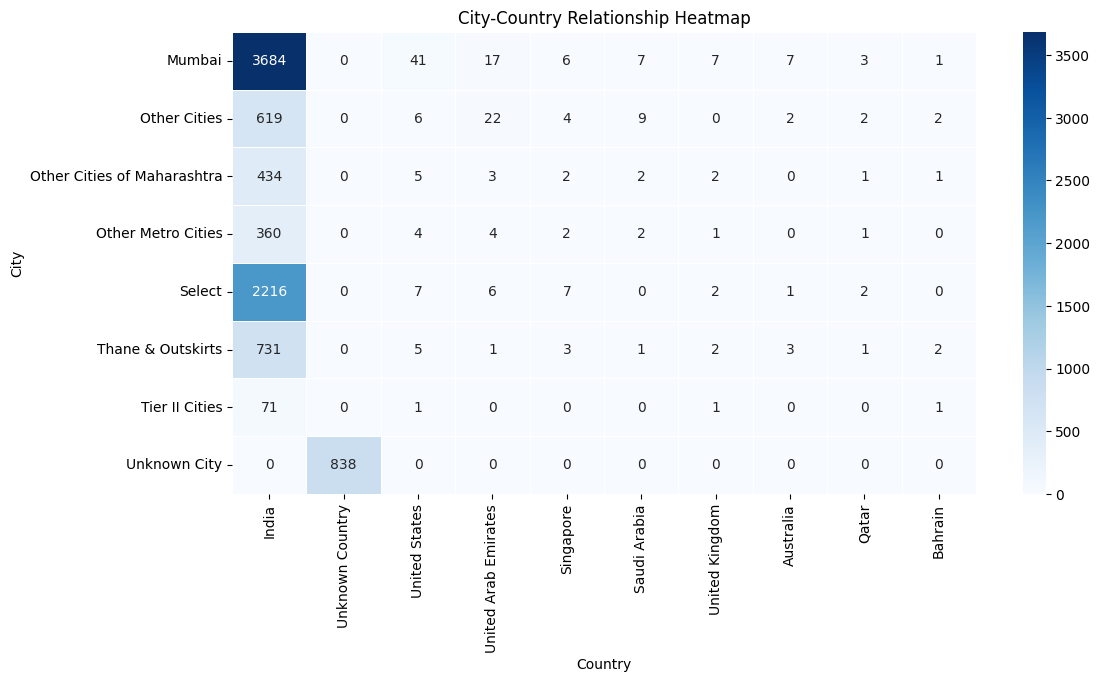

In [24]:
# Step 1: Create mappings from dataset
city_to_country = df.groupby("City")["Country"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()
country_to_city = df.groupby("Country")["City"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Print missing values before filling
print("Missing values before filling:")
print(df[["Country", "City"]].isna().sum())

# Step 2: Fill missing Country based on City
df["Country"] = df.apply(lambda row: city_to_country.get(row["City"], row["Country"]) if pd.isna(row["Country"]) else row["Country"], axis=1)

# Step 3: Fill missing City based on Country
df["City"] = df.apply(lambda row: country_to_city.get(row["Country"], row["City"]) if pd.isna(row["City"]) else row["City"], axis=1)

# Step 4: Replace any remaining NaNs with "Unknown City" and "Unknown Country"
df["City"].fillna("Unknown City", inplace=True)
df["Country"].fillna("Unknown Country", inplace=True)

# Print missing values after filling
print("Missing values after filling:")
print(df[["Country", "City"]].isna().sum())

# Step 5: Heatmap for City-Country relationships
plt.figure(figsize=(12, 6))
city_country_pivot = df.pivot_table(index="City", columns="Country", aggfunc="size", fill_value=0)

# Select top 10 most common City-Country pairs
top_city_country = city_country_pivot.loc[:, city_country_pivot.sum(axis=0).nlargest(10).index]

sns.heatmap(top_city_country, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Country")
plt.ylabel("City")
plt.title("City-Country Relationship Heatmap")
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [26]:
# To fill null values in TotalVisits and Page Views Per Visit

# Step 1: Calculate the mean for converted leads
mean_total_visits_converted = df[df['Converted'] == 1]['TotalVisits'].mean()
mean_page_views_converted = df[df['Converted'] == 1]['Page Views Per Visit'].mean()

# Step 2: Calculate the mean for not converted leads
mean_total_visits_not_converted = df[df['Converted'] == 0]['TotalVisits'].mean()
mean_page_views_not_converted = df[df['Converted'] == 0]['Page Views Per Visit'].mean()

# Step 3: Fill null values in TotalVisits and Page Views Per Visit
df.loc[(df['Converted'] == 1) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_converted
df.loc[(df['Converted'] == 1) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_converted

df.loc[(df['Converted'] == 0) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_not_converted
df.loc[(df['Converted'] == 0) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_not_converted

# Optional: Check if there are any remaining null values
print("Remaining null values in TotalVisits:", df['TotalVisits'].isnull().sum())
print("Remaining null values in Page Views Per Visit:", df['Page Views Per Visit'].isnull().sum())

Remaining null values in TotalVisits: 0
Remaining null values in Page Views Per Visit: 0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [28]:
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [29]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

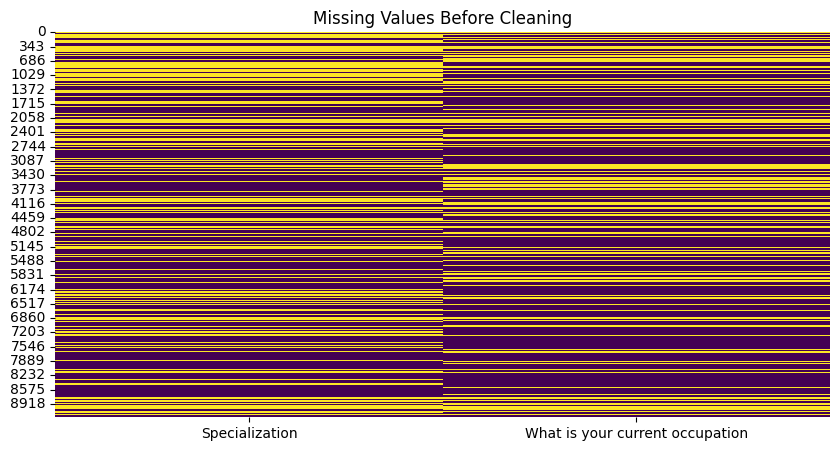


Most Common Specialization for each Occupation:
 What is your current occupation
Businessman             Marketing Management
Housewife                 Finance Management
Other                   Marketing Management
Student                   Finance Management
Unemployed                Finance Management
Working Professional    Marketing Management
Name: Specialization, dtype: object


C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_5296\2231005730.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Specialization"].fillna("Not Specified", inplace=True)
C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_5296\2231005730.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

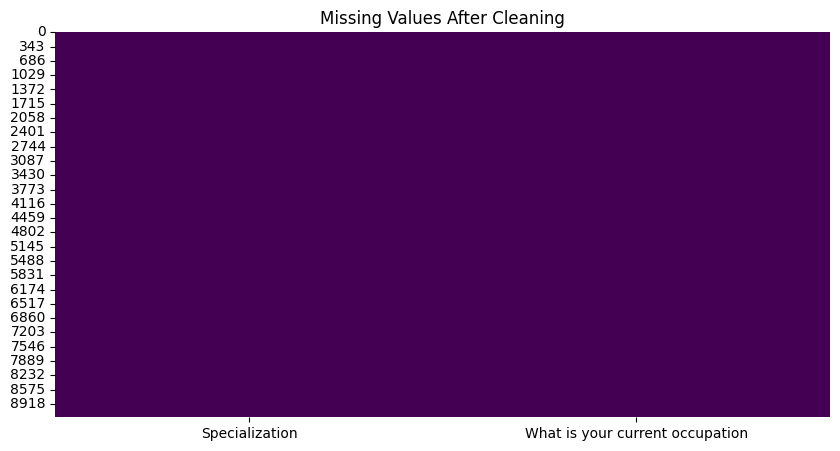

Specialization                     0
What is your current occupation    0
dtype: int64


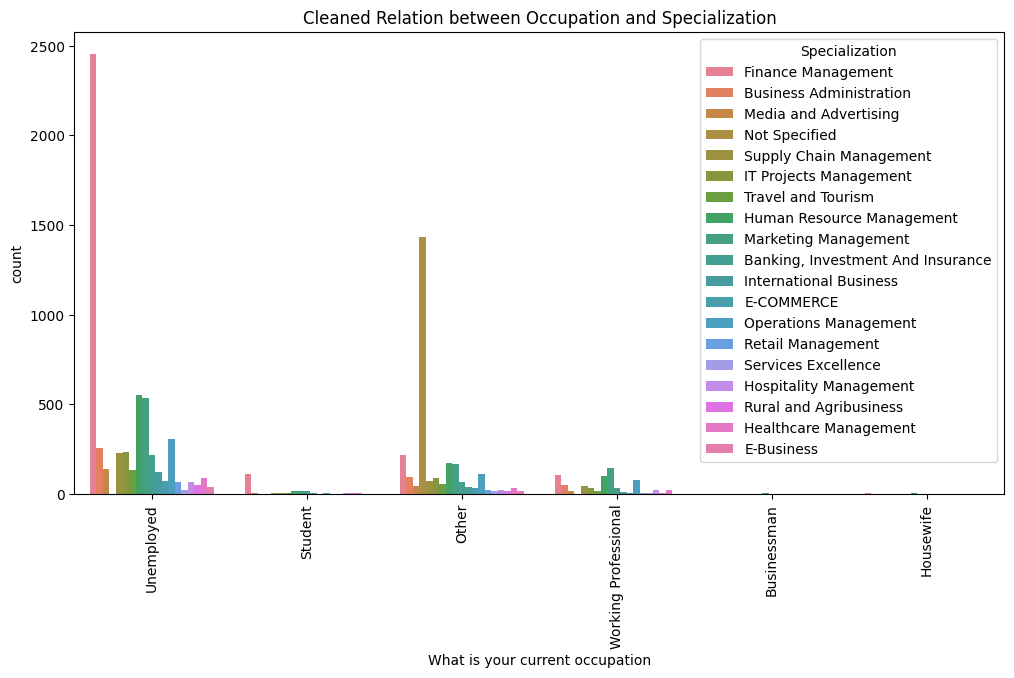

In [30]:
# Step 1: Replace "Select" in Specialization with NaN (since it's not a real category)
df["Specialization"] = df["Specialization"].replace("Select", np.nan)

# Step 2: Visualize missing values before cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df[["Specialization", "What is your current occupation"]].isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Before Cleaning")
plt.show()

# Step 3: Find common Specializations for each Occupation
specialization_counts = df.groupby("What is your current occupation")["Specialization"].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
print("\nMost Common Specialization for each Occupation:\n", specialization_counts)

# Step 4: Fill missing Specialization based on Occupation dynamically
df["Specialization"] = df.apply(
    lambda row: specialization_counts[row["What is your current occupation"]]
    if pd.isna(row["Specialization"]) and row["What is your current occupation"] in specialization_counts.index
    else row["Specialization"],
    axis=1
)

# Step 5: Fill remaining missing Specialization values with "Not Specified"
df["Specialization"].fillna("Not Specified", inplace=True)

# Step 6: Fill missing Occupation with "Other"
df["What is your current occupation"].fillna("Other", inplace=True)

# Step 7: Visualize missing values after cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df[["Specialization", "What is your current occupation"]].isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()

# Step 8: Check the final count of missing values
print(df[["Specialization", "What is your current occupation"]].isnull().sum())

# Step 9: Check final distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="What is your current occupation", hue="Specialization")
plt.xticks(rotation=90)
plt.title("Cleaned Relation between Occupation and Specialization")
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [32]:
import pandas as pd

# Step 1: Drop Unwanted Columns
df.drop(columns=[
    "How did you hear about X Education", "Lead Profile",
    "Do Not Call", "Do Not Email", "Search", "Magazine", "Newspaper Article",
    "X Education Forums", "Newspaper", "Digital Advertisement",
    "Through Recommendations", "Receive More Updates About Our Courses"
], inplace=True)


def fill_with_mode(series):
    mode_val = series.mode()
    return series.fillna(mode_val[0] if not mode_val.empty else "Not Specified")

## 1. Fill `Tags` based on `Converted`
df["Tags"] = df.groupby("Converted")["Tags"].transform(fill_with_mode)

## 2. Fill `Lead Quality` based on `Converted`
df["Lead Quality"] = df.groupby("Converted")["Lead Quality"].transform(fill_with_mode)

## 3. Fill `What matters most to you in choosing a course` with mode
df["What matters most to you in choosing a course"] = fill_with_mode(df["What matters most to you in choosing a course"])

# Step 3: Check Missing Values After Cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Tags                                                0
Lead Quality                                        0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
City                                             

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [34]:
# Step 1: Drop Unwanted Columns
df.drop(columns=[ "Asymmetrique Activity Index" ,
"Asymmetrique Profile Index",  
"Asymmetrique Activity Score" ,
"Asymmetrique Profile Score"
], inplace=True)

In [35]:
df["Lead Source"].isnull().sum()

np.int64(36)

In [36]:
df["Lead Source"].fillna("Other Sources",inplace=True)

C:\Users\SrimathiP\AppData\Local\Temp\ipykernel_5296\2547606101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Lead Source"].fillna("Other Sources",inplace=True)


In [37]:
print(df["Lead Source"].isnull().sum())

0


In [38]:
df.to_csv("Lead_Scoring_cleaned_data.csv", index=False)